In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# --- 1. Data Loading and Preprocessing ---
def load_and_prep_data(filepath):
    # Load data
    df = pd.read_csv(filepath)
    
    # The dataset has an index column in position 0 (Unnamed: 0), we drop it
    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])
    elif "" in df.columns: # Handling the empty string header from the CSV raw text
        df = df.drop(columns=[""])
        
    # Separate Features (X) and Target (y)
    # Features: biking, smoking. Target: heart.disease 
    X = df[['biking', 'smoking']]
    y = df['heart.disease']
    
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# --- 2. Model Training and Evaluation ---
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"--- {model_name} Performance ---")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return model

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Om\AppData\Local\Temp\ipykernel_15236\1012575248.py:1: SyntaxWarning: invalid escape sequence '\A'
  X_train, X_test, y_train, y_test = load_and_prep_data('E:\AIML Tasks\heart.data.csv')


--- Decision Tree Performance ---
Mean Squared Error (MSE): 2.2125
R2 Score: 0.8782


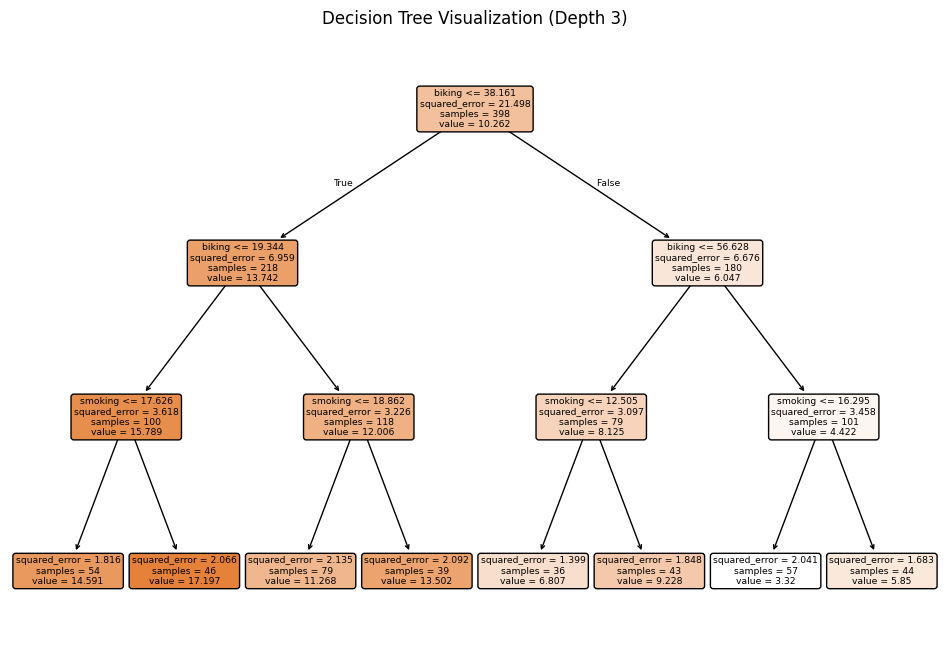

--- Random Forest Performance ---
Mean Squared Error (MSE): 0.5102
R2 Score: 0.9719


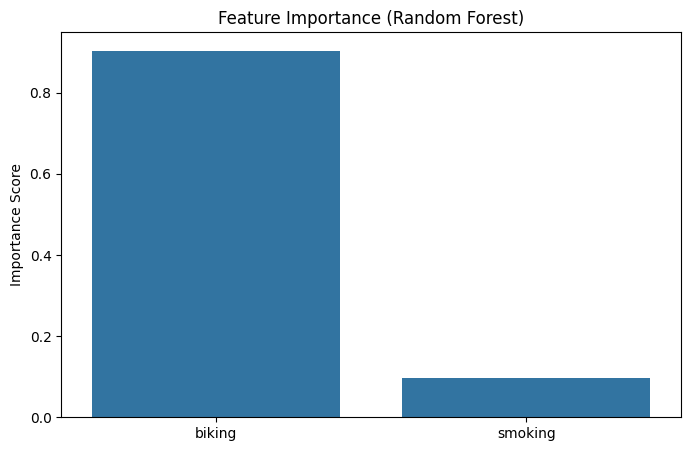


Cross-Validation MSE Scores: [0.52883361 0.82301124 0.6321743  0.58851191 0.51534867]
Average CV MSE: 0.6176


In [9]:
X_train, X_test, y_train, y_test = load_and_prep_data('E:\AIML Tasks\heart.data.csv')

# A. Decision Tree (Task 1 & 2) [cite: 7, 8]
# We limit max_depth to 3 to control overfitting and make visualization readable
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_model = train_evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

# Visualization of the Tree [cite: 7, 21]
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=['biking', 'smoking'], filled=True, rounded=True)
plt.title("Decision Tree Visualization (Depth 3)")
plt.show()

# B. Random Forest (Task 3) 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = train_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# C. Feature Importance (Task 4) 
importances = rf_model.feature_importances_
features = ['biking', 'smoking']

plt.figure(figsize=(8, 5))
sns.barplot(x=features, y=importances)
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

# D. Cross-Validation (Task 5) [cite: 11]
# We use negative MSE because sklearn cross_val_score expects a utility function (higher is better)
cv_scores = cross_val_score(rf_model, pd.concat([X_train, X_test]), pd.concat([y_train, y_test]), cv=5, scoring='neg_mean_squared_error')
print(f"\nCross-Validation MSE Scores: {-cv_scores}")
print(f"Average CV MSE: {-cv_scores.mean():.4f}")